In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/BIG DATA/archive.zip" -d "/content/drive/MyDrive/BIG DATA"

Archive:  /content/drive/MyDrive/BIG DATA/archive.zip
  inflating: /content/drive/MyDrive/BIG DATA/governors_county.csv  
  inflating: /content/drive/MyDrive/BIG DATA/governors_county_candidate.csv  
  inflating: /content/drive/MyDrive/BIG DATA/governors_state.csv  
  inflating: /content/drive/MyDrive/BIG DATA/house_candidate.csv  
  inflating: /content/drive/MyDrive/BIG DATA/house_state.csv  
  inflating: /content/drive/MyDrive/BIG DATA/president_county.csv  
  inflating: /content/drive/MyDrive/BIG DATA/president_county_candidate.csv  
  inflating: /content/drive/MyDrive/BIG DATA/president_state.csv  
  inflating: /content/drive/MyDrive/BIG DATA/senate_county.csv  
  inflating: /content/drive/MyDrive/BIG DATA/senate_county_candidate.csv  
  inflating: /content/drive/MyDrive/BIG DATA/senate_state.csv  


In [ ]:
!pip install matplotlib==3.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




In [25]:
data = pd.read_csv("/content/drive/MyDrive/BIG DATA/president_county_candidate.csv")
data

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False


In [20]:
data.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [21]:
data.tail()

,state,county,candidate,party,total_votes,won
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False
32176,Arizona,Mohave County,Write-ins,WRI,37,False


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32177 entries, 0 to 32176
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        32177 non-null  object
 1   county       32177 non-null  object
 2   candidate    32177 non-null  object
 3   party        32177 non-null  object
 4   total_votes  32177 non-null  int64 
 5   won          32177 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 1.3+ MB


In [23]:
data.columns

Index(['state', 'county', 'candidate', 'party', 'total_votes', 'won'], dtype='object')

In [33]:
data.party.value_counts().reset_index()

,index,party
0,DEM,4633
1,REP,4633
2,LIB,4633
3,WRI,3792
4,IND,3288
5,GRN,3034
6,ALI,1562
7,CST,1350
8,PSL,1028
9,ASP,745


In [34]:
data.candidate.value_counts().reset_index()

,index,candidate
0,Joe Biden,4633
1,Donald Trump,4633
2,Jo Jorgensen,4633
3,Write-ins,3792
4,Howie Hawkins,2994
5,Rocky De La Fuente,1562
6,Don Blankenship,1317
7,Brock Pierce,1124
8,Kanye West,1082
9,Gloria La Riva,1028


In [35]:
data.state.value_counts().reset_index()

,index,state
0,Vermont,5412
1,Maine,2988
2,Massachusetts,1755
3,Colorado,1389
4,Texas,1102
5,Iowa,990
6,Arkansas,975
7,Tennessee,949
8,New Hampshire,948
9,Minnesota,870


In [47]:
data.groupby('state')['total_votes'].sum().sort_values(ascending = False)


state
California              17495906
Texas                   11317911
Florida                 11067456
New York                 8613546
Illinois                 7215501
Pennsylvania             6925255
Ohio                     5922202
Michigan                 5539302
North Carolina           5524801
Georgia                  4997716
New Jersey               4564234
Virginia                 4460524
Washington               4087631
Massachusetts            3631402
Arizona                  3387326
Wisconsin                3297352
Minnesota                3277171
Colorado                 3256953
Tennessee                3054534
Maryland                 3037030
Indiana                  3033198
Missouri                 3025962
South Carolina           2513329
Oregon                   2374321
Alabama                  2323304
Louisiana                2148062
Kentucky                 2136768
Connecticut              1824280
Iowa                     1690871
Oklahoma                 1560699
Utah

In [36]:
win= data[data.won == True]
win.head()


,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
8,Delaware,Sussex County,Donald Trump,REP,71230,True
12,District of Columbia,District of Columbia,Joe Biden,DEM,39041,True
19,District of Columbia,Ward 2,Joe Biden,DEM,29078,True


In [37]:
max_voted_candidate = win.groupby('candidate')['total_votes'].sum()
max_voted_candidate = pd.DataFrame(max_voted_candidate)
max_voted_candidate = max_voted_candidate.sort_values(by= 'total_votes',ascending=False)
top5_max_voted_candidate = max_voted_candidate.head(5)
top5_max_voted_candidate = top5_max_voted_candidate.reset_index()
#top5_max_voted_candidate.keys()
top5_max_voted_candidate

,candidate,total_votes
0,Joe Biden,59402371
1,Donald Trump,41137685
2,Write-ins,32543
3,Jo Jorgensen,33


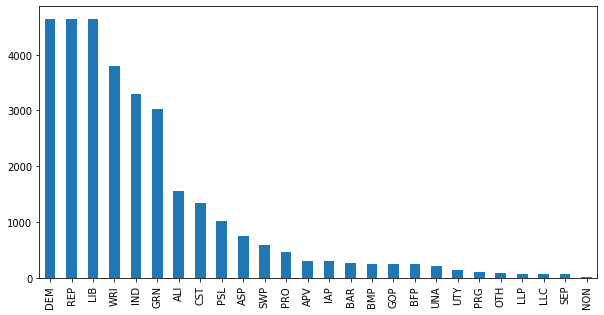

In [38]:
plt.figure(figsize=(10,5))
data.party.value_counts().plot.bar()

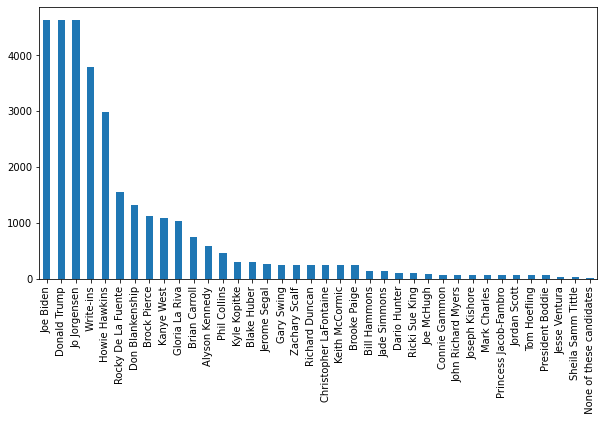

In [39]:
plt.figure(figsize=(10,5))
data.candidate.value_counts().plot.bar()

In [45]:

total_votes_df = data.groupby('candidate')['total_votes'].sum().reset_index().sort_values(by='total_votes',ascending=False)

df = total_votes_df.sort_values(by='total_votes')

fig1 = px.bar(df, x='total_votes', y='candidate', orientation='h')

fig1.update_layout(template='simple_white', height=800)
fig1.show()